<a href="https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALLER 2**

*PREGUNTA 1* : Consultar y realizar los ejercicios propuestos en el cuaderno Transformada de Fourier.
la solucion de la pregunta 1 se visualiza en el siguiente link


https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/taller_2ipynb.ipynb


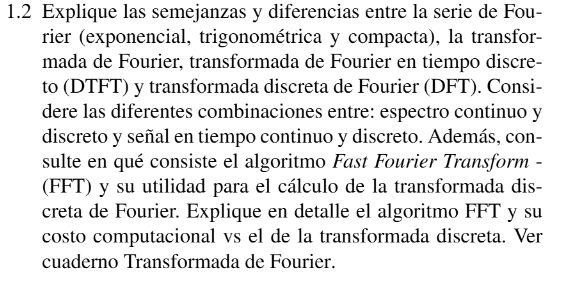

Serie de Fourier:

La Serie de Fourier se aplica a señales periódicas en el tiempo continuo. Su representación en frecuencia es discreta.

**Serie Trigonométrica**: Descompone la señal en una suma de senos y cosenos con diferentes frecuencias y amplitudes. Serie Exponencial: Utiliza exponenciales complejas para representar la señal, lo que simplifica algunas operaciones matemáticas. Serie Compacta: Es una forma alternativa de la serie trigonométrica, que combina los términos de seno y coseno en una sola función con amplitud y fase.

**Transformada de Fourier (FT)**:

La Transformada de Fourier se aplica a señales no periódicas en el tiempo continuo. Su representación en frecuencia es continua. Permite analizar el contenido de frecuencia de cualquier señal en tiempo continuo.

**Transformada de Fourier en Tiempo Discreto (DTFT)**:

La DTFT se aplica a señales aperiódicas en el tiempo discreto. Su representación en frecuencia es continua y periódica. Es la contraparte de la Transformada de Fourier para señales discretas.

**Transformada Discreta de Fourier (DFT)**:

La DFT se aplica a señales periódicas en el tiempo discreto. Su representación en frecuencia es discreta y periódica. Es la versión discreta de la Serie de Fourier y se utiliza comúnmente en procesamiento digital de señales.

**Algoritmo Fast Fourier Transform (FFT)**:

La FFT es un algoritmo eficiente para calcular la Transformada Discreta de Fourier (DFT) y su inversa. Su utilidad principal radica en la reducción significativa del costo computacional para calcular la DFT, especialmente para secuencias de datos largas.

**Explicación detallada del algoritmo FFT**:

El algoritmo FFT se basa en la idea de dividir una DFT de tamaño N en DFTs más pequeñas. La FFT típica, como la de Cooley-Tukey, funciona dividiendo la secuencia de entrada en sub-secuencias de tamaño par e impar. Este proceso de división se repite recursivamente hasta que se obtienen DFTs de tamaño muy pequeño (por ejemplo, tamaño 2). Luego, los resultados de estas DFTs más pequeñas se combinan de manera eficiente para obtener la DFT completa. Esto se logra utilizando propiedades matemáticas de las raíces de la unidad compleja.

**Costo computacional vs el de la Transformada Discreta**:

Costo computacional de la DFT directa: El cálculo directo de la DFT de una secuencia de tamaño N requiere aproximadamente O(N^2) operaciones matemáticas (multiplicaciones y sumas). Costo computacional de la FFT: La FFT reduce el costo computacional a aproximadamente O(N log N) operaciones. Esta reducción es drástica, especialmente para valores grandes de N. Por ejemplo, para N=1024, N^2 es aproximadamente 1 millón, mientras que N log N es aproximadamente 1024 * 10 = 10240. Esta diferencia permite realizar análisis de frecuencia de señales en tiempo real o de manera mucho más rápida.

En resumen, la FFT es fundamental en el procesamiento digital de señales porque hace que el cálculo de la DFT sea computacionalmente viable para muchas aplicaciones.

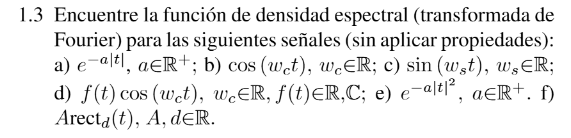

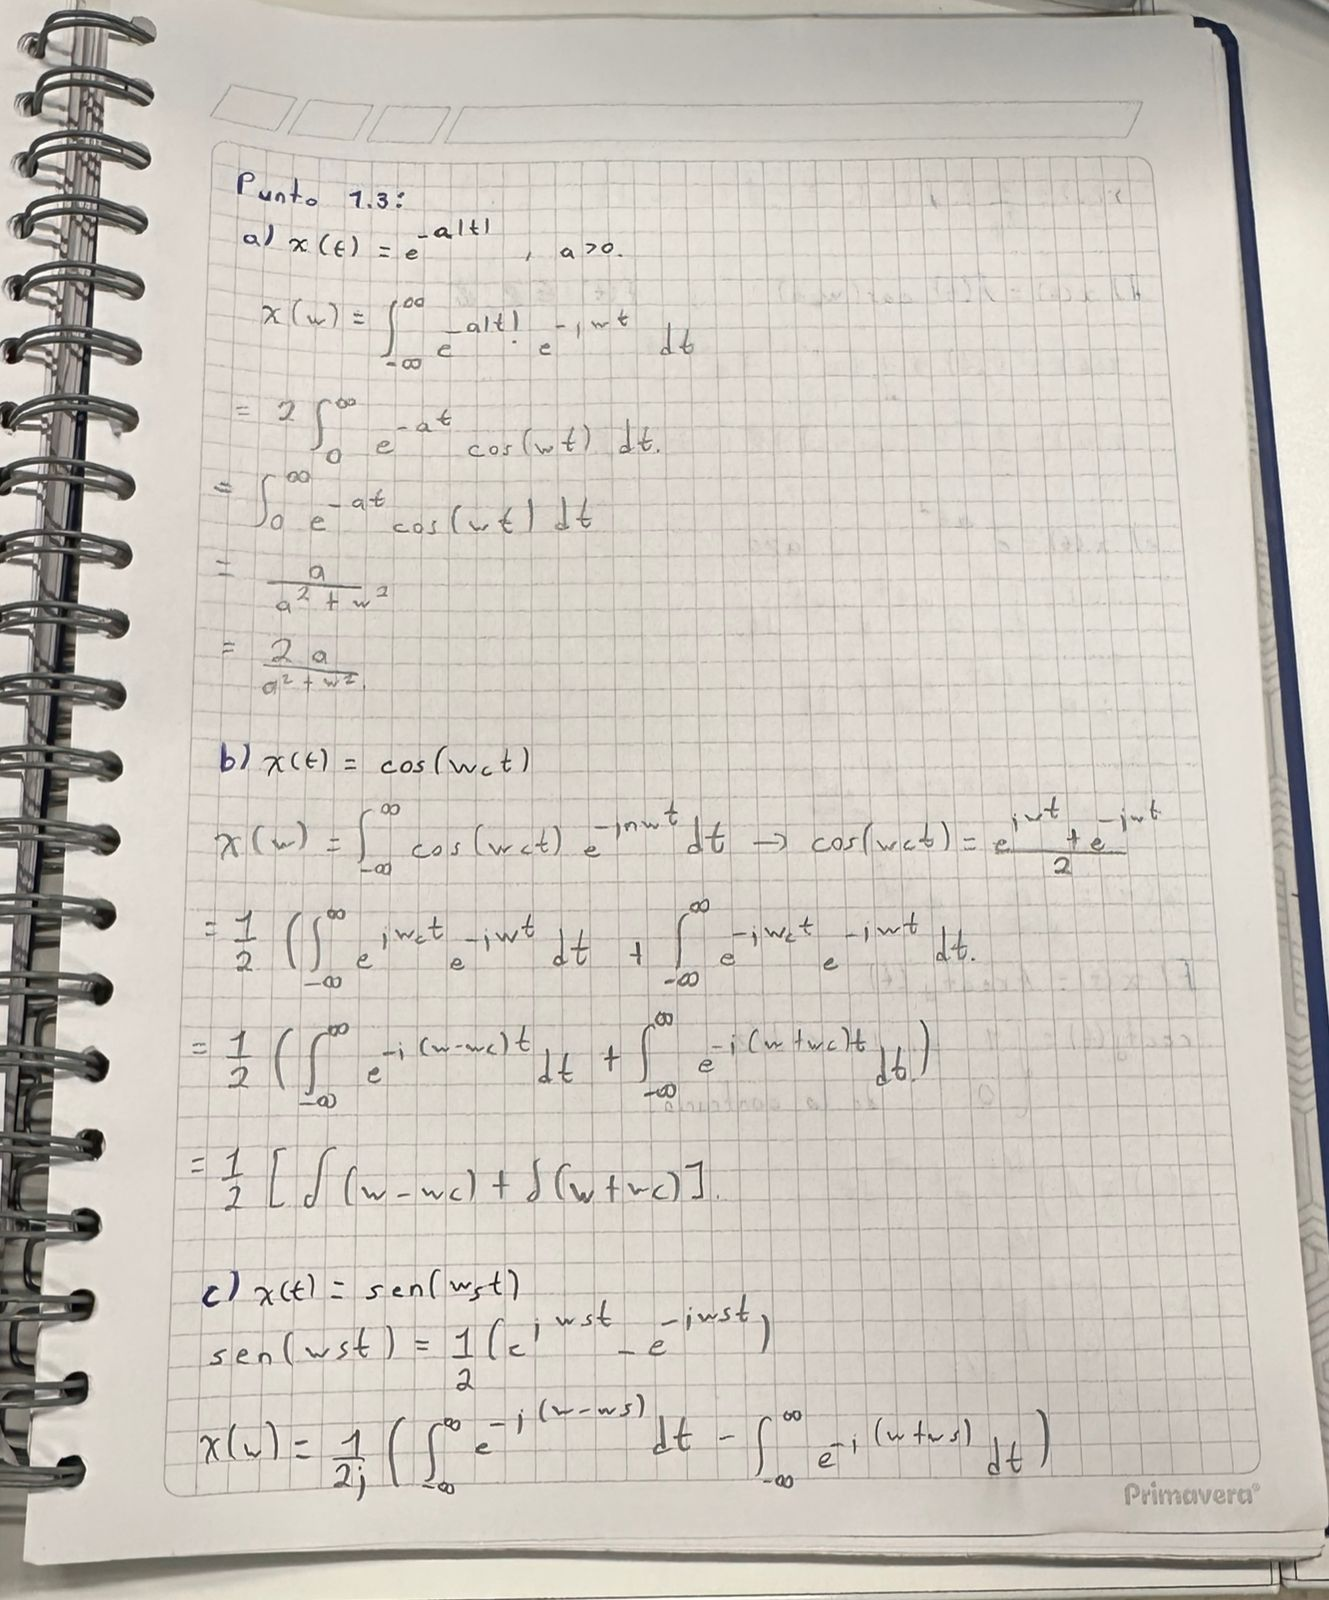

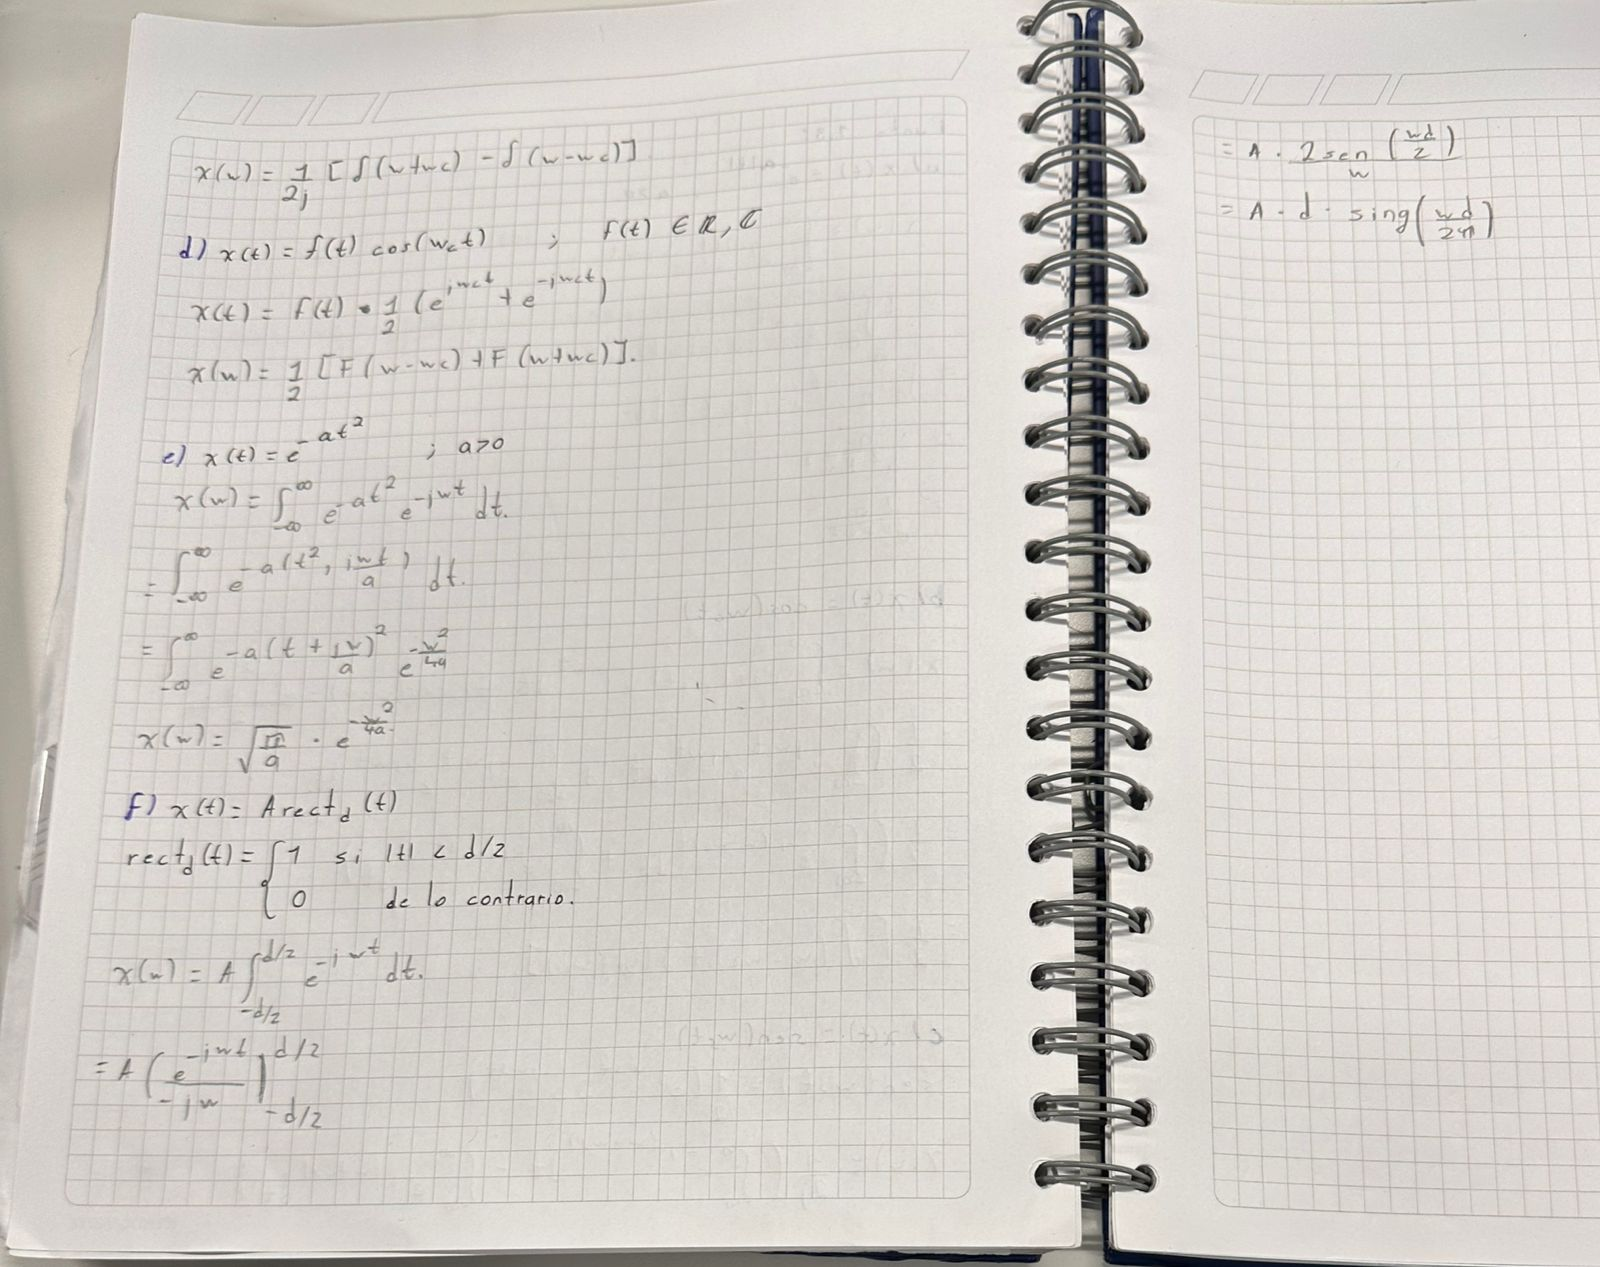

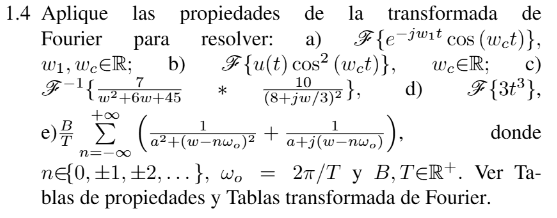

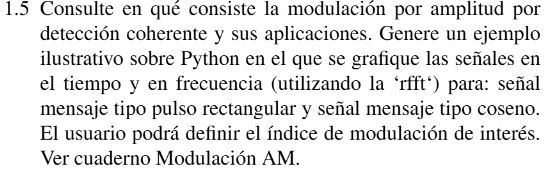

**Solucion:**

La modulación por amplitud (AM) consiste en multiplicar una señal portadora sinusoidal por una señal de mensaje.
La detección coherente (o demodulación coherente) implica usar un oscilador local sincronizado en frecuencia y fase con la portadora original para recuperar la señal.

$s(t) = \left[1 + k_a \, m(t)\right] \cdot \cos(2\pi f_c t)$

Donde:

$m(t)$: señal mensaje (por ejemplo, pulso o coseno)


$fc$: frecuencia de la portadora


$ka$: índice de modulación (cuánto varía la amplitud con la señal)

Para
$∣
𝑘
𝑎
𝑚
(
𝑡
)
∣
≤
1
$, se evita sobre-modulación

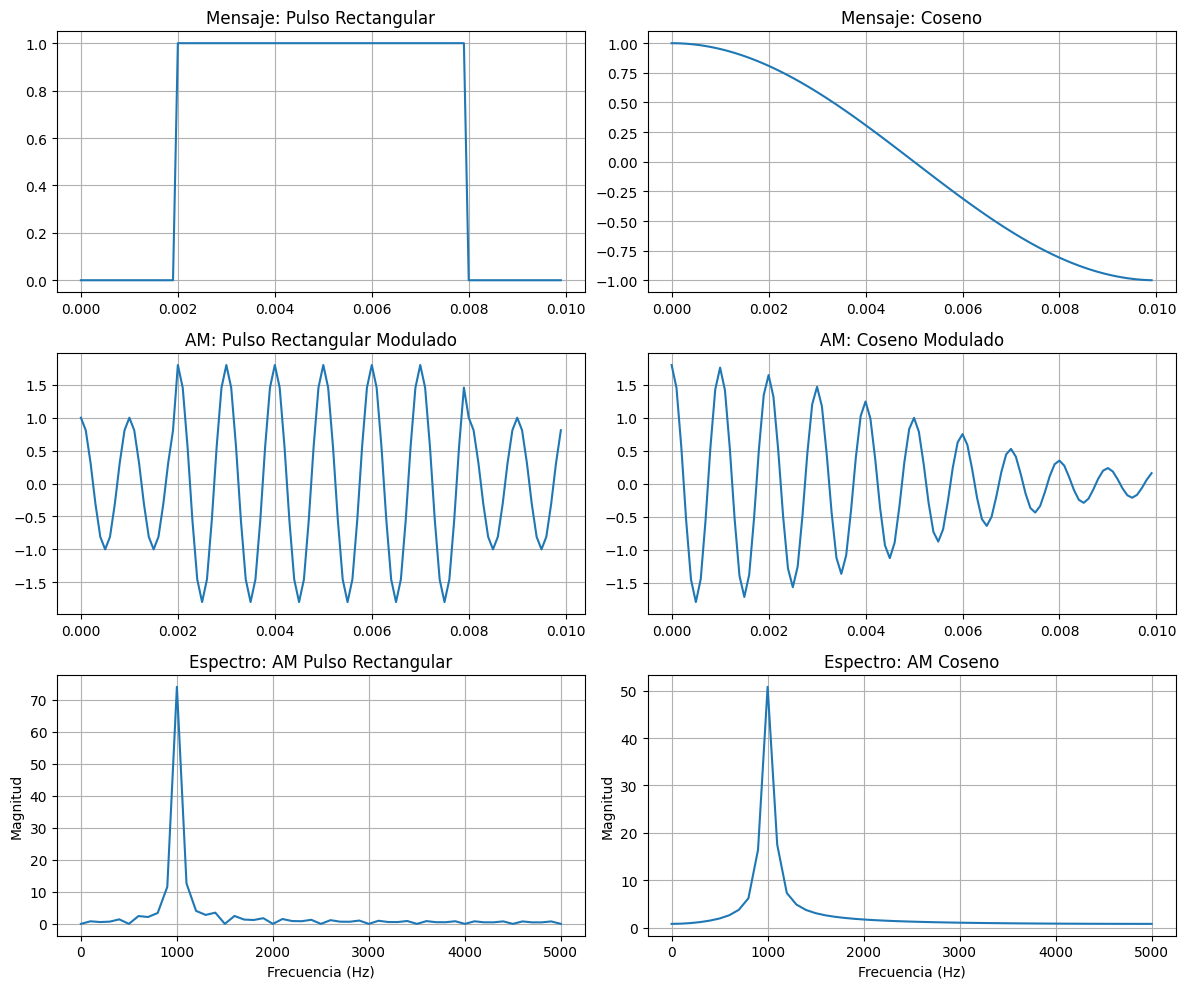

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parámetros básicos
fs = 10000  # frecuencia de muestreo
T = 0.01    # duración (segundos)
t = np.linspace(0, T, int(fs*T), endpoint=False)
fc = 1000   # frecuencia portadora
ka = 0.8    # índice de modulación (modificable por el usuario)

# Señal mensaje 1: pulso rectangular
m1 = np.zeros_like(t)
m1[int(0.002*fs):int(0.008*fs)] = 1  # pulso entre 2ms y 8ms

# Señal mensaje 2: coseno
fm = 50  # frecuencia del mensaje
m2 = np.cos(2*np.pi*fm*t)

# Señales AM moduladas
s1 = (1 + ka * m1) * np.cos(2 * np.pi * fc * t)
s2 = (1 + ka * m2) * np.cos(2 * np.pi * fc * t)

# Espectros
def plot_fft(signal, title):
    N = len(signal)
    yf = np.abs(rfft(signal))
    xf = rfftfreq(N, 1/fs)
    plt.plot(xf, yf)
    plt.title(title)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.grid()

#Gráficas

plt.figure(figsize=(12, 10))

# Tiempo: pulso rectangular
plt.subplot(3, 2, 1)
plt.plot(t, m1)
plt.title("Mensaje: Pulso Rectangular")
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, s1)
plt.title("AM: Pulso Rectangular Modulado")
plt.grid()

plt.subplot(3, 2, 5)
plot_fft(s1, "Espectro: AM Pulso Rectangular")

# Tiempo: coseno
plt.subplot(3, 2, 2)
plt.plot(t, m2)
plt.title("Mensaje: Coseno")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, s2)
plt.title("AM: Coseno Modulado")
plt.grid()

plt.subplot(3, 2, 6)
plot_fft(s2, "Espectro: AM Coseno")

plt.tight_layout()
plt.show()
